# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt


plt.style.use('seaborn')

In [2]:
def plot_results (run_folder: str, strategy: str, xlabel: str, ylabel: str, title: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    results = {
        'Infected': {
            'Color': 'red',
            'Totals': [],
            'STD': [] 
        },
        'Hospitalised': {
            'Color': 'green',
            'Totals': [],
            'STD': [] 
        },
        'Dead': {
            'Color': 'blue',
            'Totals': [],
            'STD': [] 
        },
    }
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        match = re.match(r'' + strategy + r'\(\d+\,\s(\d+\.\d+)\)', filename)
        
        if match is None:
            continue
        
        rho = float(match.groups()[0])
        
        totals_df = pd.read_csv(os.path.join(filename_path, 'totals.csv'))
        
        for key in results.keys():
            results[key]['Totals'].append((rho, totals_df.iloc[-1][key]))
            results[key]['STD'].append((rho, totals_df.iloc[-1][key + '_STD']))
        
    for key in results.keys():
        results[key]['Totals'].sort()
    
    plt.figure(figsize=(7, 4))
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for key in results.keys():
        X = [x for x, _ in results[key]['Totals']]
        y = [y for _, y in results[key]['Totals']]
        yerr = [y for x, y in results[key]['STD']]
        
        plt.plot(X, y, color=results[key]['Color'], alpha=0.25)
        plt.errorbar(X, y, yerr=yerr, fmt="o", color=results[key]['Color'])
    
    plt.xlim(0, 1)
    plt.ylim(-0.025, 1)
    
    plt.legend()
    plt.show()

# Results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


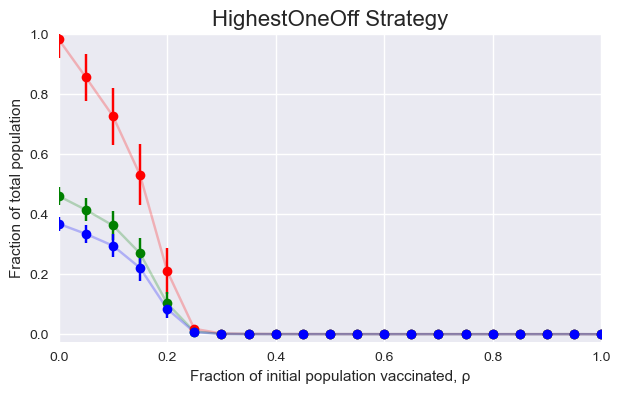

In [3]:
plot_results('section_2a',
             'HighestOneOff',
             'Fraction of initial population vaccinated, ρ',
             'Fraction of total population',
             'HighestOneOff Strategy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


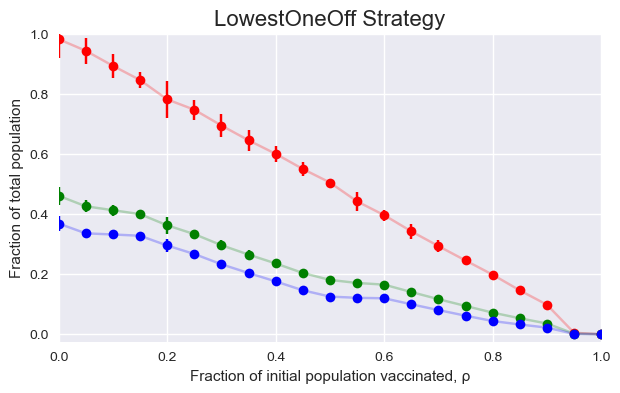

In [4]:
plot_results('section_2b',
             'LowestOneOff',
             'Fraction of initial population vaccinated, ρ',
             'Fraction of total population',
             'LowestOneOff Strategy')